<h1 align='center'> EGEE 437 Homework Solutions </h1><p>
<h2 align='center'> Homework 02 </h2>
<h3 align='center'> Paulo Soares </h3>
<h4 align='center'> Original File: 2017. Updated on February, 2021 </h4>   

<h3>0. Load Required Packages</h3>

In [1]:
import numpy as np # "NumPy is the fundamental package for scientific computing with Python." np is how you call the package
import matplotlib.pyplot as plt # "Matplotlib is a Python 2D plotting library which produces publication quality figures..."
import scipy as sp #"SciPy is a Python-based ecosystem of open-source software for mathematics, science, and engineering." 
import scipy.integrate as integrate
import scipy.special as special
import sys #Information about the system

%pylab inline
#Graphs are shown below the code cell instead in a new window.

print(sys.version)

Populating the interactive namespace from numpy and matplotlib
3.8.5 (default, Sep  3 2020, 21:29:08) [MSC v.1916 64 bit (AMD64)]


In [2]:
## Here we're adjusting how we want our graphics to be displayed ##
#
#Matplotlib options
from matplotlib.dates import DateFormatter
plt.rcParams['figure.figsize'] = [16.0, 8.0]
plt.rcParams['figure.dpi'] = 100
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['font.size'] = 24
plt.rcParams['legend.fontsize'] = 'medium'
plt.rcParams['figure.titlesize'] = 'large'

<h2 align='center'> Homework #2</h2>

In [3]:
# Defining trigonometric functions - Used in problem 4 and 5

def cosd(x):
    return cos(radians(x))
  
def sind(x):
    return sin(radians(x))
  
def tand(x):
    return tan(radians(x))
  
def acosd(x):
    return degrees(np.arccos(x))
  
def asind(x):
    return degrees(np.arcsin(x))
  
def atand(x):
    return degrees(np.arctan(x))

## Problem 1

<font size="3">Write down a code to calculate blackbody fractions by numerical approximation. You will use this script in the next question.</font> <p>

### Answers 

In [63]:
### Inputs ###
# Approximation of blackbody table using nm inputs instead of micrometer inputs:
h = 6.625e-34 # Planck Constant (J*s)
c = 2.998e17 # Speed of light (nm/s)
k = 1.381e-23 # Boltzmann constant J/K

def calculator(lambda_val, T):
    
    # Needed function gamma:
    C2nm = h*c/k
    gamma = C2nm/(lambda_val*T)

    # Making a column of 10 integers to sum the fraction
    n = np.arange(1.0,11.0,1.0)

    #Numerical approximation of equation in SECS textbook - Eq. 3.12
    frac = (15.0/pi**4)*(exp(-n*gamma)/n)*(gamma**3 + (3.0*gamma**2)/n + (6.*gamma)/n**2 + (6)/n**3)

    # Final results
    fraction = sum(frac)
    print("Total fraction of energy for wavelength:", fraction) #Not necessary
    return(fraction)


## Problem 2

<font size="3">
The human body has a surface area of $\sim 2\ m^2$, and the surface temperature of bare skin is 32$^\circ$C (The area of the human body is presented just as a cool information, you won't use it to solve the following items. However, you MUST be careful with units ($\mu m$ and $\eta m$)).
<ol type="a">
	<li> Given the emissivity of the human body is $\epsilon = 0.97$, what is our radiant exitance (or radiance integrated across all angles) in $W/m^2$? </li>
	<li> Now evaluate the fraction of greybody radiant exitance from humans that will pass through the "sky window" from 8-14 $\mu m$. </li>
    <li> Present the exitance value in $W/m^2$. </li>
</ol>
</font>

### Answers 

<font face="sans-serif" size="3"><b> 1. </b></font>     

In [4]:
## Inputs ##
e = 0.97 # emittance value
sig = 5.6697e-8 # Stefan–Boltzmann Constant
T = (32+273.15) # Temp in Kelvin

## Calculation ##
#Using Eq. 3.7 - SECS book
E = e*sig*T**4
E

476.85386955187386

<font face="Courier" size="3">
The radiant exitance can be calculated as follows:

\begin{align}
\epsilon \times {E_b} & = \epsilon \sigma T^{4} \nonumber \\
               & \nonumber  \\
               & = (0.97) \times [5.67 \times 10^{-8}\ W/m^{2}\, K^{4}] (32+273.15)K^4  \\
                & =  476.88 W/m^2 
\end{align}

<b>ANS: The radiant exitance is $\epsilon \times {E_b} = 477\ W/m^2 $.</b>
</font><br /> 

<font face="sans-serif" size="3"><b> 2. </b></font>   

In [48]:
# Using the script coded in question 4, it is possible just to take the difference between the wavelenghts:
a = calculator(14000, (32+273.15))
b = calculator(8000,(32+273.15))
f = a-b
print('The fraction between 8-14 micrometers is ',f)


Total fraction of energy for wavelength: 0.5283625411907229
Total fraction of energy for wavelength: 0.149057296680115
The fraction between 8-14 micrometers is  0.3793052445106079


<font face="Courier" size="3">
$\lambda T_{1}$ for 8 $\mu m$: $8\ \mu m \times (32+273.15)K = 2441.2\ \mu m K$<br/>
Fraction is : 0.15 at 8000 nm<p>

$\lambda T_{2}$ for 14 $\mu m$: $14\ \mu m \times (32+273.15)K = 4272.1\ \mu m K$<br/>
Fraction is : 0.53 at 14,000 nm<p>

By subtracting the fractions for each, we arrive at the correct fraction emitted through the sky window: $f_{8-14}$.

<b>ANS: The fraction between 8-14 $\mu m$: $f_{8-14} = 0.38$</b>
</font><br /> 

<font face="sans-serif" size="3"><b> 3. </b></font>    

In [10]:
# Remember the smart tip? now modify the exit function including the function you coded before!
exit = f*E
exit

180.87317358620302

<font face="Courier" size="3">

The radiant exitance can be calculated by the following equation:<br/>
\begin{equation}
E_{8-14} = f_{8-14} \cdot \epsilon \cdot \sigma T^4
\end{equation} <p>

\begin{equation}
E_{8-14} = 0.38 \cdot 476.88\ W/m^2 = 181.21\ W/m^2
\end{equation}

<b>ANS: The radiant exitance between 8-14 $\mu m$: $E_{8-14} = 181\ W/m^2$.</b>
</font><br /> 

## Problem 3

<font size="3">
<ol type="a">
	<li> Using the value for the photosphere surface temperature what fraction of extraterrestrial irradiance is found for $\lambda < 780\ nm$? </li>
	<li> What fraction is found for $\lambda < 3000\ nm$? </li>
	<li> What fraction is found between $780\ nm < \lambda < 3000\ nm$ (the IR sub-band of extraterrestrial shortwave irradiance) </li>
</ol>
</font>

### Answers 

<font face="sans-serif" size="3"><b> 1. </b></font>    

In [14]:
# Using the script coded in question 1 it is possible just to take the difference between the wavelenghts:
f_780 = calculator(780, (5777))
f_780

Total fraction of energy for wavelength: 0.5654934182273178


0.5654934182273178

<font face="Courier" size="3">
Calculate the energy in the band of interest with the code in problem 4, assuming surface temperature of the photosphere of 5777 K:<p>

<b>ANS: $f_{(0 - \lambda T)} = 0.57$ or  $57\%$ (for $\lambda = 780\ nm$).</b>

</font><br /> 

<font face="sans-serif" size="3"><b> 2. </b></font>   

In [15]:
# Tip: once gain use the script you coded in the item 1.# Using the script coded in question 4, it is possible just to take the difference between the wavelenghts:
f_3000 = calculator(3000, (5777))
f_3000

Total fraction of energy for wavelength: 0.9787906985399999


0.9787906985399999

<font face="Courier" size="3">
Calculate the energy in the band of interest the same way using the code in problem 4:<p>

<b>ANS: $f_{(0 - \lambda T)} = 0.98$ or $98\%$ (for $\lambda = 3000\ nm$).</b>
</font><br /> 

<font face="sans-serif" size="3"><b> 3. </b></font>   

In [17]:
f_tot = f_3000-f_780
f_tot

0.4132972803126821

<font face="Courier" size="3">
One takes the difference between the two prior results to find the fraction between 780 nm (high energy, $\lambda_1$) and 3000 nm (low energy, $\lambda_2$):<p>

\begin{equation}
f_{0-\lambda_2 T} - f_{0 - \lambda_1 T} = 0.98 - 0.57 = 0.41
\end{equation}<p>

<b>ANS: $f_{\lambda_2 - \lambda_1} = 0.41$ or $41\%$.</b>
</font><br /> 

## Problem 4

<font size="3">
Plot the Planck spectrum (Bose-Einstein Distributions) of the Sun as a blackbody at the photosphere, and provide the integrated irradiance (area under the curve). Compare your results to value offered in the preceding problem. [Your plot may have bounds from 200 nm to 50,000 nm]
</font> <p>

Higher Spectral Emissive Power of a Blackbody: 23.452449140921434 Lower Spectral Emissive Power: 4584200.474740854 .Integrated Power: 63096761.01570354 .Fraction: 0.999165697986504


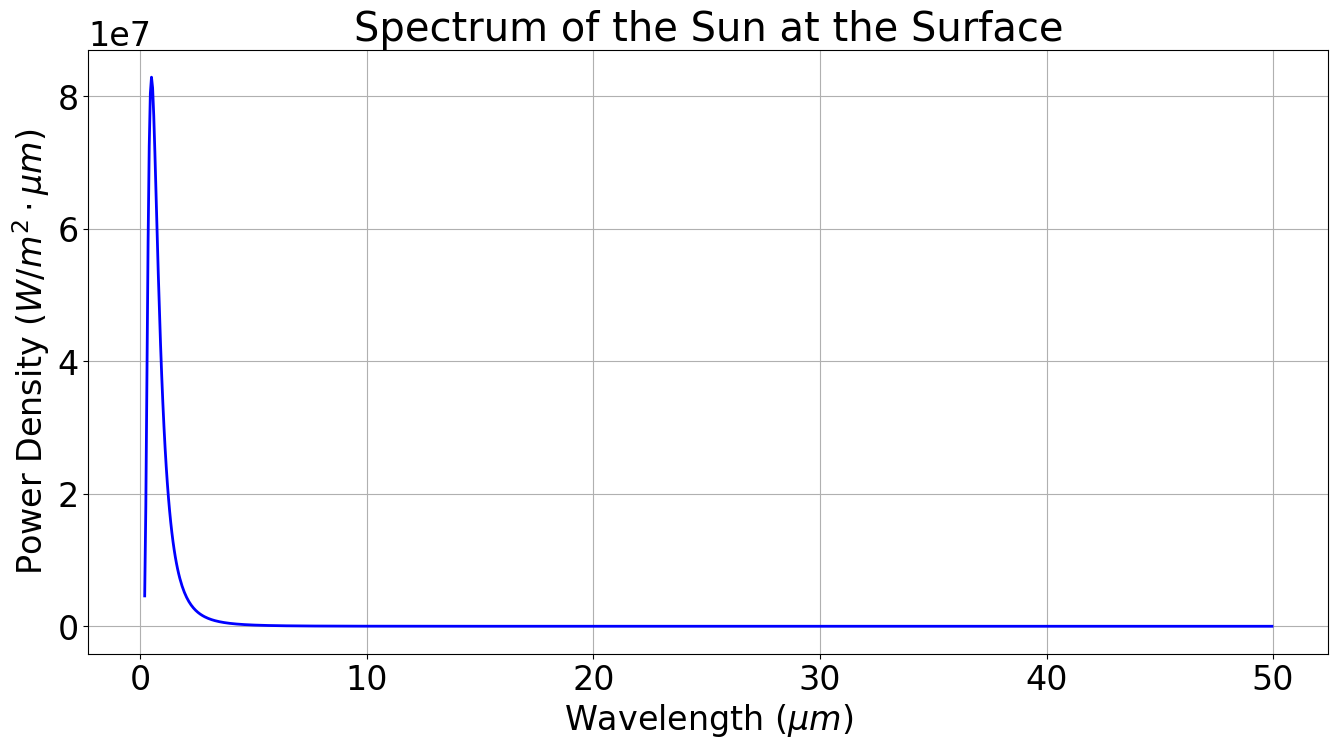

In [5]:
## Inputs - sigma was previously defined, remember?
C1=3.742e8 # in units of W micrometer/m2 
C2=1.4384e4 # in units of micrometer*K
T = 5777

## HINT 1: Create a column of lambda values, steps of 0.05 micrometers from lowerLimit to upperLimit, like function L below:
l = np.arange(0.2,50,0.05) # this creates a list of numbers from zero to one (one is not included), in increments of 0.1. 

lT=l*T # multiplying the vector L by a constant T (temperature of the blackbody)

## HINT2: integrate the fraction of the spectral energy (write - code - the equation) and then integrate it [Eq. 3.10 of SECS]:
integrand = (((C1)/((sig*lT**5)*(exp(C2/lT)-1)))) 

## Integration method in Python:
## integrate.trapz is trapezoidal integration of the integrand 
## for each value of (l*T)
## this is the fraction of power inside the integral relative to the S-B law [Eq. 3.9 of SECS]
fract = (integrate.trapz(integrand, lT)) # unitless

## using the fraction with [Eq. 3.7 of SECS] I can find integrated emissive power density 
int_power = fract*sig*T**4 # units of W/m2

## The spectral emissive power ("sep") for 1 micrometer at  Low and High wavelengths each. 
## This should be _much_ less power than the total integration, right?
spL=(C1/((0.2**5)*(exp((C2)/(0.2*T))-1))) # should be high energy - Planck’s Law (established for the surface of a blackbody): 
spH=(C1/((50**5)*(exp((C2)/(50*T))-1))) # should be low energy - Planck’s Law (established for the surface of a blackbody):


## Preparations for the plot; calculate spectral emissive power ("sep") 
##for each wavelength creates a new column of (sep) data at each wavelength for Temp T
spT=(C1/((l**5)*(exp((C2)/(l*T))-1))) #Eq. 3.6 of SECS

## The following lines generate the desired plot
fig, ax = plt.subplots()
ax.plot(l, spT, '-b', linewidth=2.0) # Tells Python to plot spT in respect to l, -b = blue line, linewidth is linewidth - feel free to change the width if you want. 
ax.set_xlabel('Wavelength ' r'$(\mu m)$') # self explanatory
ax.set_ylabel('Power Density ' r'$(W/m^2\cdot \mu m)$') # self explanatory
ax.set_title('Spectrum of the Sun at the Surface') # The title of the graph
#ax.set_xlim(0,2.5) # Uncomment in case you need to change the limits of the x axis
#ax.set_ylim(0,1500) # Uncomment in case you need to change the limits of the y axis
plt.grid()
plt.savefig('prob_Planck_Sun.jpeg')

# Final answer should look like this:
print("Higher Spectral Emissive Power of a Blackbody:", spH, "Lower Spectral Emissive Power:", spL, ".Integrated Power:", int_power, ".Fraction:", fract)

## Problem 5

<font size="3">
Plot the spectrum of the atmosphere (the radiant exitance or glow), given an effective isotropic average temperature of 255 K. 
Where does the most probable wavelength seem to occur (by observation)?  
Explain why the bounds of plotting are significantly different from those of incoming shortwave solar irradiance. [Your plot may have bounds from 2,500 nm to 50,000 nm]
</font>

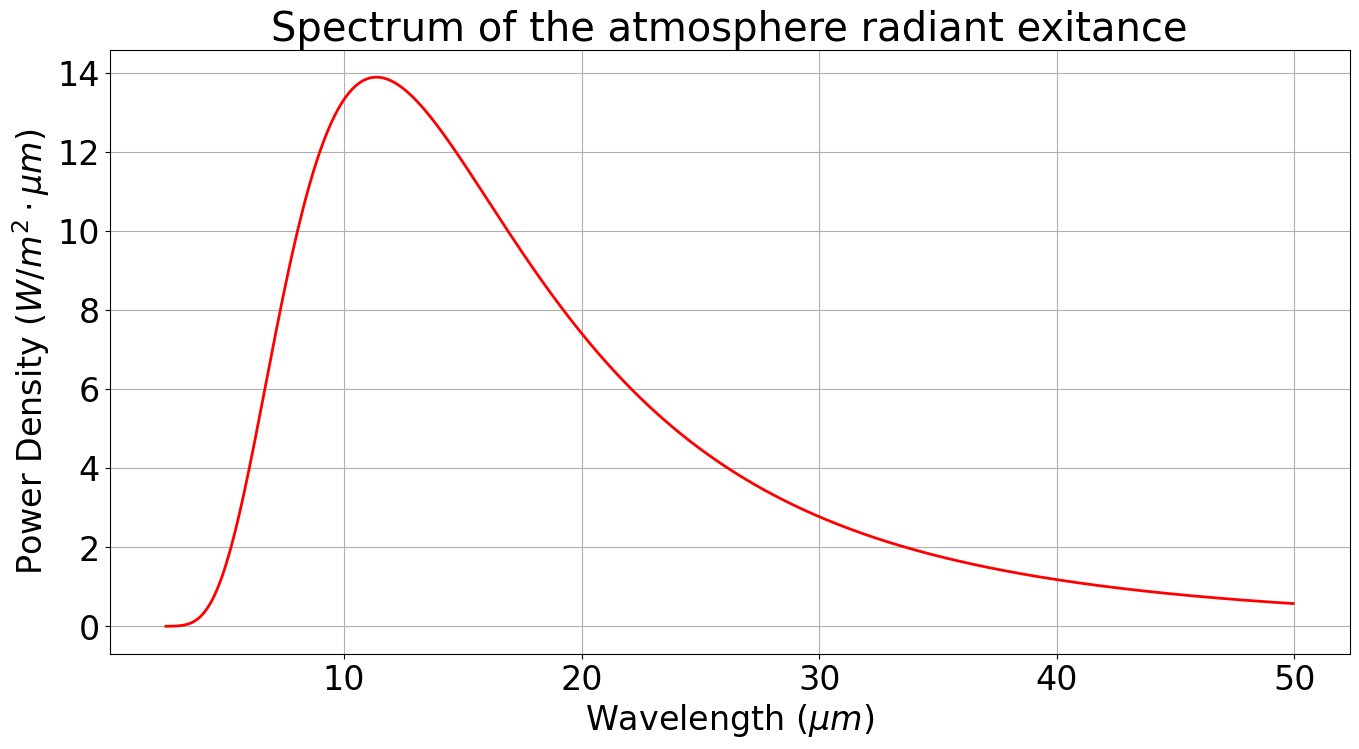

In [7]:
## Inputs
L2 = np.arange(2.5,50,0.05)
T2 = 255 # Kelvin
LT2=L2*T2 

## Preparations for the plot; calculate spectral emissive power ("sp") 
## for each wavelength creates a new column of (sep) data at each wavelength for Temp T
spT2=(C1/((L2**5)*(exp((C2)/(LT2))-1)))

## The following lines generate the desired plot
fig, ax = plt.subplots()
ax.plot(L2, spT2, '-b', linewidth=2.0, color = 'r') # Tells Python to plot spT in respect to l, -b = blue line, linewidth is linewidth - feel free to change the width if you want. 
ax.set_xlabel('Wavelength ' r'$(\mu m)$') # self explanatory
ax.set_ylabel('Power Density ' r'$(W/m^2\cdot \mu m)$') # self explanatory
ax.set_title('Spectrum of the atmosphere radiant exitance') # The title of the graph
#ax.set_xlim(0,2.5) # Uncomment in case you need to change the limits of the x axis
#ax.set_ylim(0,1500) # Uncomment in case you need to change the limits of the y axis
plt.grid()
plt.savefig('prob_Planck_Earth.jpeg')